<a href="https://colab.research.google.com/github/kowshiksarker/Analytics-Repo/blob/master/KNN_BostonHousing_KowshikSarker_19BM61K09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting The Price Of House Using KNN Over Boston Housing Dataset**

Dataset Link => https://www.kaggle.com/schirmerchad/bostonhoustingmlnd?select=housing.csv

**KNN(K Nearest Neighbor)** is a **supervised** learning algorithm which reuires **labelled** data.
By using this we can solve both **classification** and continuous **regression** problems.
For Classification we use **KNeighborsClassifier** method of sklearn.neighbors library.
For Regression we use **KNeighborsRegressor** method of sklearn.neighbors library.
In this dataset our **exploratory** or **predictant** variable is the **price** of house which is a continuous variable. 
So we will use the KneighborsRegressor method to predict the price of the house based on the given predictor variables.

**Importing Libraries**

In [8]:
# Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange
from matplotlib import pyplot
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

**Loading The Dataset**

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


**Let's Do Some Exploratory Data Analysis**

In [4]:
df.shape

(489, 4)

So we have total 489 observation. Here **MEDV** is our predictor variable and all other remaining variables are our feature variables.

In [5]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [6]:
# Check for data types and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [9]:
# TODO: Minimum price of the data
minimum_price = np.min(df['MEDV'])

# TODO: Maximum price of the data
maximum_price = np.max(df['MEDV'])

# TODO: Mean price of the data
mean_price = np.mean(df['MEDV'])

# TODO: Median price of the data
median_price = np.median(df['MEDV'])

# TODO: Standard deviation of prices of the data
std_price = np.std(df['MEDV'])

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


Here we can see the Standard Devaition of price is very high. This can lead us to a difficulty during model validation. Let's divide all the value in MEDV column by 10000 so that we can get a valid MSE score at last. So we are assuming the prices are now scaled in 10K's scale.

In [18]:
df['MEDV']=df['MEDV']/10000
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,50.40
1,6.421,9.14,17.8,45.36
2,7.185,4.03,17.8,72.87
3,6.998,2.94,18.7,70.14
4,7.147,5.33,18.7,76.02


In [19]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564,45.434294
std,0.643650,7.081990,2.111268,16.534028
min,3.561000,1.980000,12.600000,10.500000
25%,5.880000,7.370000,17.400000,35.070000
50%,6.185000,11.690000,19.100000,43.890000
75%,6.575000,17.120000,20.200000,51.870000
max,8.398000,37.970000,22.000000,102.480000


In [20]:
# Correlation between the features
set_option('precision', 2)
df.corr(method='pearson')

,RM,LSTAT,PTRATIO,MEDV
RM,1.00,-0.61,-0.30,0.70
LSTAT,-0.61,1.00,0.36,-0.76
PTRATIO,-0.30,0.36,1.00,-0.52
MEDV,0.70,-0.76,-0.52,1.00


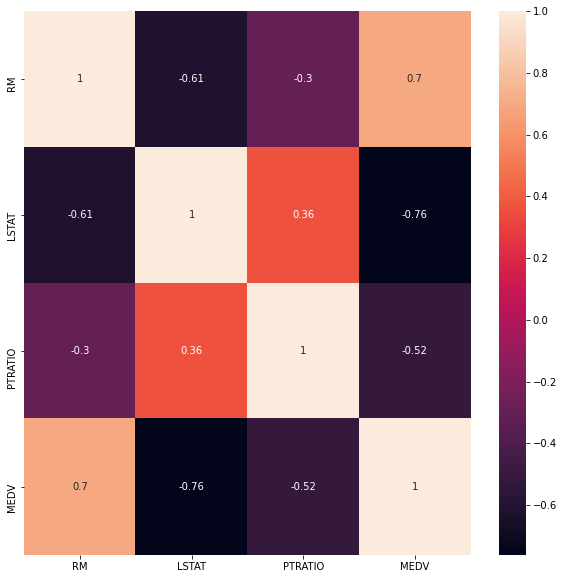

In [21]:
pyplot.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot= True)

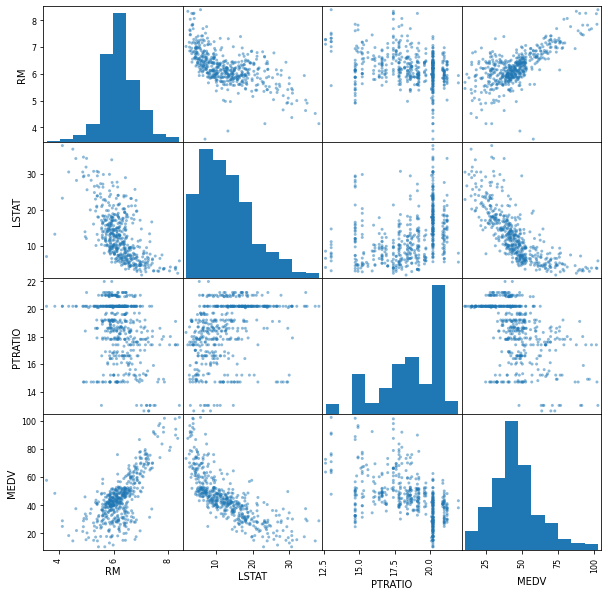

In [22]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(10,10))

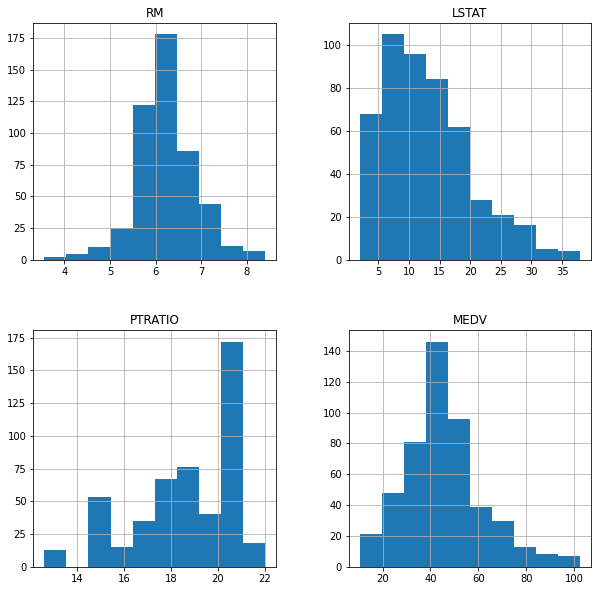

In [23]:
# histograms
df.hist(figsize=(10,10));

Now as we are good with our data, lets split our dataset into features and outcome variable

In [24]:
# split the data
array= df.values
X = array[:, 0:3]
Y = array[:,3]
seed= 7
X_train , X_validation, Y_train , Y_validation = train_test_split(X, Y, test_size=0.20, random_state=seed)

In [25]:
X.shape

(489, 3)

In [26]:
Y.shape

(489,)

In [29]:
# KNN Algorithm Application With Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=10,random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [30]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    
     print (" %f (%f) with: %r" % (mean, stdev, param))

Best: -51.240465 using {'n_neighbors': 9}
 -94.350664 (17.404972) with: {'n_neighbors': 1}
 -60.882864 (13.156670) with: {'n_neighbors': 3}
 -53.518977 (12.852079) with: {'n_neighbors': 5}
 -51.473812 (11.180972) with: {'n_neighbors': 7}
 -51.240465 (10.470128) with: {'n_neighbors': 9}
 -52.180725 (12.418125) with: {'n_neighbors': 11}
 -53.735131 (12.616654) with: {'n_neighbors': 13}
 -55.088135 (12.254277) with: {'n_neighbors': 15}
 -55.352945 (12.525346) with: {'n_neighbors': 17}
 -56.589906 (11.637055) with: {'n_neighbors': 19}
 -56.656771 (11.895372) with: {'n_neighbors': 21}


So n_neighbors=9 will give us the best result with least MSE.Lets run the final model based on this

In [32]:
knr=KNeighborsRegressor(n_neighbors=9)
knr.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

**Prediction and Evaluation Based On KNN Regression Model**

In [33]:
y_pred=knr.predict(X_validation)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_validation, y_pred))
print('MSE:', metrics.mean_squared_error(Y_validation, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_validation, y_pred)))
print('r2 score:',metrics.r2_score(Y_validation, y_pred))

MAE: 5.437380952380951
MSE: 53.7335611111111
RMSE: 7.3303179406565375
r2 score: 0.7726102789333826


Lets see graphically if we can interpret that n_neighbours=9 will give us the least error value.

In [35]:
from sklearn.model_selection import cross_val_predict
error=[]
for k in range (1,21):
  knn=KNeighborsRegressor(n_neighbors=k)
  y_pred=cross_val_predict(knn,X,Y,cv=5)
  error.append(metrics.mean_squared_error(Y,y_pred))

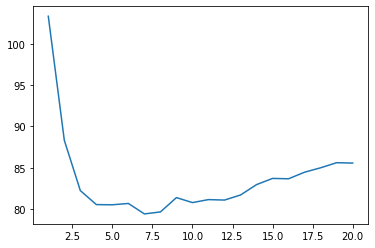

In [36]:
plt.plot(range(1,21),error)

From the upper plot we can see that for 9 number of neighbors we are getting least error. Thus our model is performing well.